# What do your blood sugars tell you?

## 📖 Background

Diabetes mellitus remains a global health issue, causing several thousand people to die each day from this single condition. Finding and avoiding diabetes in the earlier stages can help reduce the risk of serious health issues such as circulatory system diseases, kidney malfunction, and vision loss. This competition involves developing a predictive model for effectively detecting potential Diabetes cases, ideally, before commencing preventive treatment.


## 💾 The data

The dataset contains diagnostic measurements that are associated with diabetes, which were collected from a population of Pima Indian women. The data includes various medical and demographic attributes, making it a well-rounded resource for predictive modeling.

The columns and Data Types are as follows:

- Pregnancies
Type: Numerical (Continuous)
Description: Number of times the patient has been pregnant.

- Glucose
Type: Numerical (Continuous)
Description: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

- BloodPressure
Type: Numerical (Continuous)
Description: Diastolic blood pressure (mm Hg).

- SkinThickness
Type: Numerical (Continuous)
Description: Triceps skinfold thickness (mm).

- Insulin
Type: Numerical (Continuous)
Description: 2-Hour serum insulin (mu U/ml).

- BMI
Type: Numerical (Continuous)
Description: Body mass index (weight in kg/(height in m)^2).

- DiabetesPedigreeFunction
Type: Numerical (Continuous)
Description: A function that represents the likelihood of diabetes based on family history.

- Age
Type: Numerical (Continuous)
Description: Age of the patient in years.

- Outcome
Type: Categorical (Binary)
Description: Class variable (0 or 1) indicating whether the patient is diagnosed with diabetes. 1 = Yes, 0 = No.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer

In [3]:
import pandas as pd

data = pd.read_csv('data/diabetes.csv')
# Display the first few rows of the DataFrame
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Univariate Exploration
- Explore every feature and visualize the distribution of the data in each column

In [6]:
def plot_histogram_with_stats(df, column_name, bins = 10, color = 'tab:blue'):
    """
    Plots a histogram for the specified column in the DataFrame and adds vertical lines for median and mean.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to plot.
    """
    
    ax = sns.histplot(data = df, x = column_name, bins = bins, color = color, kde = True)
    
    # Calculate the mean and median for column:
    mean = df[column_name].mean()
    median = df[column_name].median()
    
    # Creating vertical lines that represent median and mean
    ax.axvline(mean, color = 'r', linestyle = '--',linewidth = 1, label = 'Mean')
    ax.axvline(median, color = 'b', linestyle = '--', linewidth = 1, label = 'Median')
    
    plt.title(f'The Distribution Of {column_name}')
    plt.xlabel(f'{column_name}')
    plt.ylabel('Count')
    
    plt.legend()
    
    plt.show()
    

In [7]:
color = sns.color_palette()
color

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

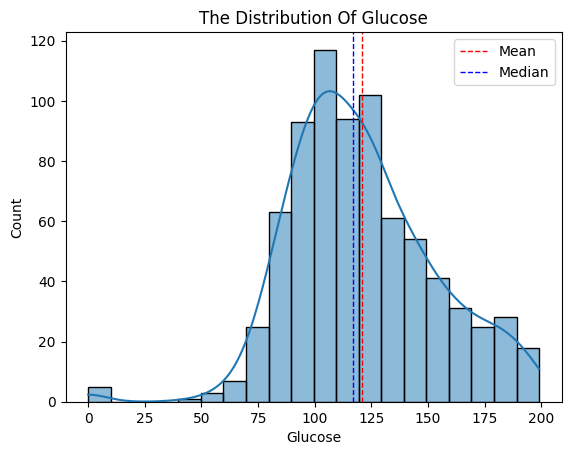

In [8]:
plot_histogram_with_stats(data, 'Glucose', color = color[0], bins = 20)

**Observations**

* The shape looks like normal distribution, but it appears to be slightly right-skewed. This is evidenced by the mean being greater than the median.
* Most of the glucose levels being under 140.
* Since higher glucose assosiated with diabetes having more data with "normal" glucose levels makes it better to focus on other factors in the data
* Values below 60 mg/dL are likely to indicate a health issue and should be considered carefully.
* Outliers:
   * Zeros: The values at 0 mg/dL are definitely outliers and should be handled as missing or erroneous data.
* Given the roughly normal distribution and the presence of outliers, median imputation would be a good choice.

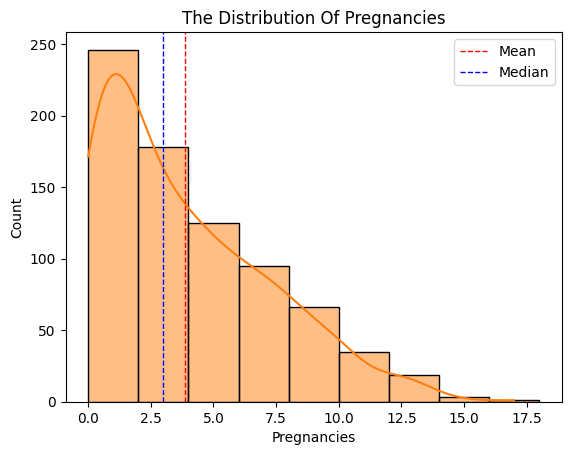

In [9]:
bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
plot_histogram_with_stats(data, 'Pregnancies', color = color[1], bins = bins)

**Observations**
* The data of the column 'Pregnancies' is right skewed, because the tail is on the right and the mean is greater than the median
* Most of the values are less than 8, it means we are targetting the majority, and study the effect of being pregnent with getting diabetes.

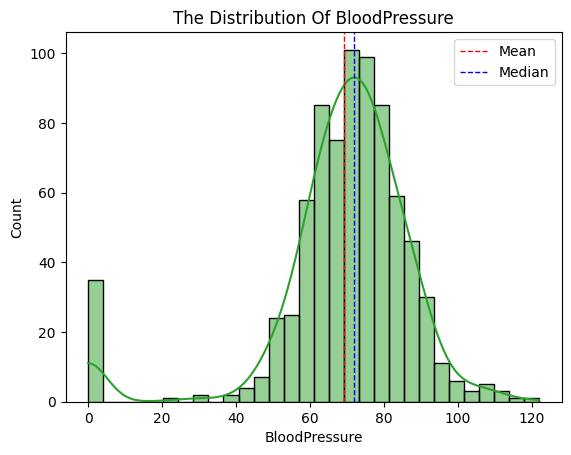

In [10]:
plot_histogram_with_stats(data, 'BloodPressure', color = color[2], bins = 30)

**Observations**
* The plot looks like normal distribution with being slightly left skewed, because of the number of zero values which could indicates outliers in the data.
* Most values falls between 90 and 55 
* Normal Diastolic Blood Pressure: Between 60-80 mm Hg, however a diastolic blood pressure in the 50s or 40s can be seen in some healthy, young, and fit individuals without causing problems, extremely low diastolic blood pressure, such as 20 mm Hg, is a medical emergency, Sp it might indicates more outliers there.


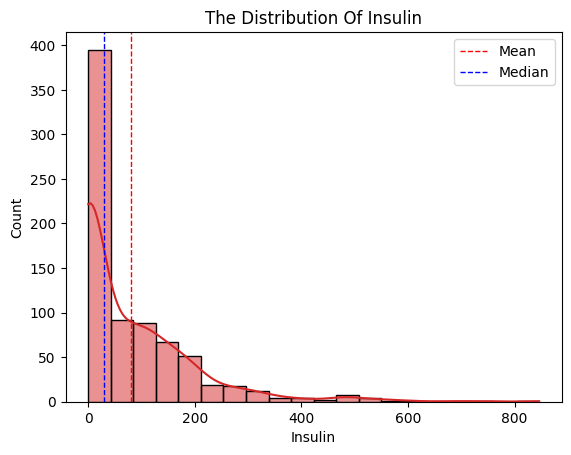

In [11]:
plot_histogram_with_stats(data, 'Insulin', color = color[3], bins = 20)

<Axes: ylabel='Insulin'>

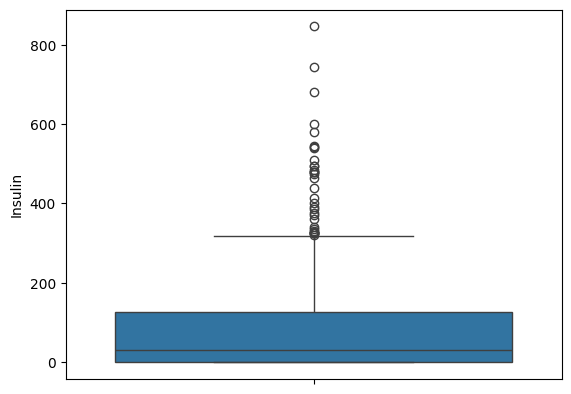

In [12]:
# Since it looks there are so many outliers i will use box plot
sns.boxplot(data = data, y = 'Insulin')

In [13]:
zeros_insulin = data[data['Insulin'] == 0]
zeros_insulin

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


From the Descriptive Statistics:
* Standard Deviation: 115.24 µU/mL, indicating a high variability in insulin levels.

There are 374 instances (about 48.7% of the data) where the insulin level is 0 µU/mL. This could indicate missing or unrecorded values rather than actual zero insulin levels.

I will use KNN imputation technique to impute the zero values.

In [14]:
zeros_skin = data[data['SkinThickness'] == 0]
zeros_skin

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


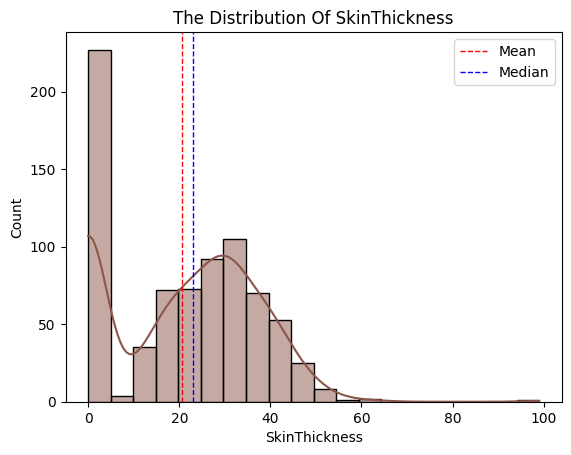

In [15]:
plot_histogram_with_stats(data, 'SkinThickness', color = color[5], bins = 20)

There are 227 instances in the 'SkinThickness' column that are equal to zero, which could indicate to missing values, we're going to use the median to impute the missing values, since the mean is less than the median it indicates that the data is skewed (left skewed)

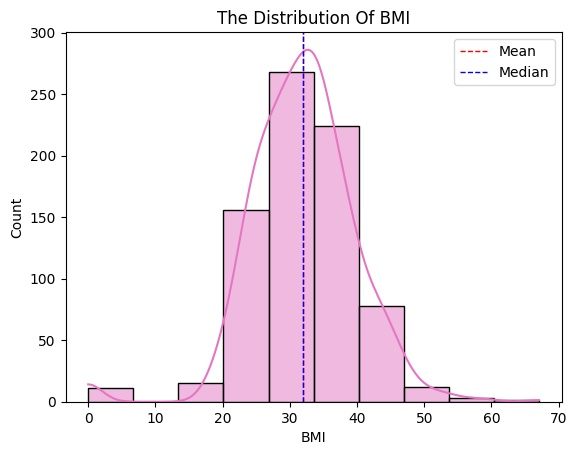

In [16]:
plot_histogram_with_stats(data, 'BMI', color = color[6])

**Observations**
* The distribution appears roughly normal with a peak around 28-35 (overweight).
* Values close to zero or equal zero are not possible and will be considered missing values that will be treated.
*  While high BMI values (over 40) indicate severe obesity and are possible in real-world data, they could also be outliers depending on the population being studied, so values over 50 will be considered outliers.
*  Since the mean = the median, the imputaion strategy will be mean imputaion.

### Cleaning Stage
* Using KNN imputaion technique i will impute the zeros in the 'Insulin' column


In [17]:
# make a copy of the data
data_cleaned = data.copy()

In [18]:
upper_cap = data_cleaned['Insulin'].quantile(0.99)

data_cleaned['Insulin'] = np.where(data_cleaned['Insulin'] > upper_cap, upper_cap, data_cleaned['Insulin'])

In [19]:
# First replace the zeros with nan
data_cleaned['Insulin'].replace(0, np.nan, inplace = True)

C:\Users\HITECH\AppData\Local\Temp\ipykernel_14396\3285620484.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['Insulin'].replace(0, np.nan, inplace = True)


In [20]:
knn_imputer = KNNImputer(n_neighbors = 5)

In [21]:
data_cleaned[['Insulin']] = knn_imputer.fit_transform(data_cleaned[['Insulin']])

In [22]:
# Making sure the imputing was successful
data_cleaned['Insulin'].describe()

count    768.000000
mean     153.218782
std       78.110968
min       14.000000
25%      121.500000
50%      153.218782
75%      153.218782
max      519.900000
Name: Insulin, dtype: float64

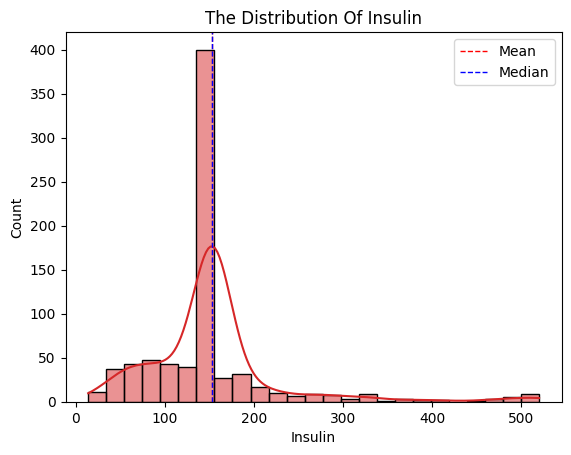

In [23]:
plot_histogram_with_stats(data_cleaned, 'Insulin', color = color[3], bins = 25)

In [24]:
# Impute the Glucose column with the median
median_g = data['Glucose'].median()
data_cleaned['Glucose'].replace(0, median_g, inplace = True)

C:\Users\HITECH\AppData\Local\Temp\ipykernel_14396\3644098636.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['Glucose'].replace(0, median_g, inplace = True)


In [25]:
# Check if the cleaning process was successful
data_cleaned['Glucose'].describe()

count    768.000000
mean     121.656250
std       30.438286
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [26]:
zeros_blood = data[data['BloodPressure'] == 0]
zeros_blood

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [27]:
# for blood pressure column since there are only 35 values that are zeros 
# Since the data for 'BloodPressure' column is not highly skewed i will impute the null values 
# (zeros) with mean

# calculate the mean for 'BloodPressure' column
mean = data_cleaned['BloodPressure'].mean()
data_cleaned['BloodPressure'].replace(0, mean, inplace = True)

C:\Users\HITECH\AppData\Local\Temp\ipykernel_14396\3984529196.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['BloodPressure'].replace(0, mean, inplace = True)


In [28]:
# Making sure the imputing was successful
data_cleaned['BloodPressure'].describe()

count    768.000000
mean      72.254807
std       12.115932
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

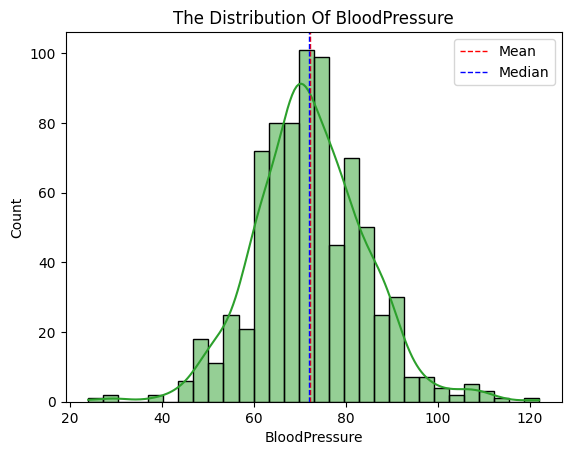

In [29]:
plot_histogram_with_stats(data_cleaned, 'BloodPressure', color = color[2], bins = 30)

In [30]:
# Getting the median of the 'SkinThickness' colummn
median_skin = data_cleaned['SkinThickness'].median()

# Replacing the 0's with the mean
data_cleaned['SkinThickness'].replace(0, median_skin, inplace = True)

C:\Users\HITECH\AppData\Local\Temp\ipykernel_14396\3676352324.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['SkinThickness'].replace(0, median_skin, inplace = True)


In [31]:
# Check if the cleaning (imputing) was successful
data_cleaned['SkinThickness'].describe()

count    768.000000
mean      27.334635
std        9.229014
min        7.000000
25%       23.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

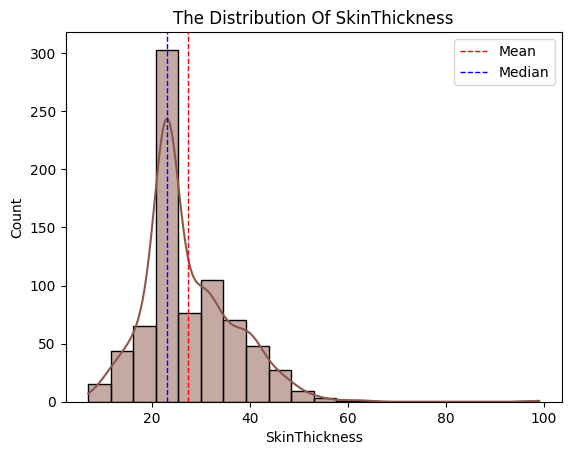

In [32]:
plot_histogram_with_stats(data_cleaned, 'SkinThickness', color = color[5], bins = 20)

In [33]:
# Impute the 'BMI' column with mean 
mean_bmi = data['BMI'].mean()
data_cleaned['BMI'].replace(0, mean_bmi, inplace = True)

C:\Users\HITECH\AppData\Local\Temp\ipykernel_14396\2019976190.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['BMI'].replace(0, mean_bmi, inplace = True)


In [34]:
# Check if the cleaning process was successful
data_cleaned['BMI'].describe()

count    768.000000
mean      32.450805
std        6.875374
min       18.200000
25%       27.500000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [35]:
# For the values greater than 50 i will remove them because if this bmi was a real data 
# and there's a real person with this high bmi then we could have wrong data associated with a true 
# data (like insulin levels or outcome) 
high_bmi = data[data['BMI'] > 50]
# Getting the index of the high bmi to drop them using their indexes
bmi_ind = high_bmi['BMI'].index

In [36]:
# Since there are only 8 rows dropping them is a good choice
data_cleaned.drop(labels = bmi_ind, axis = 0, inplace = True)

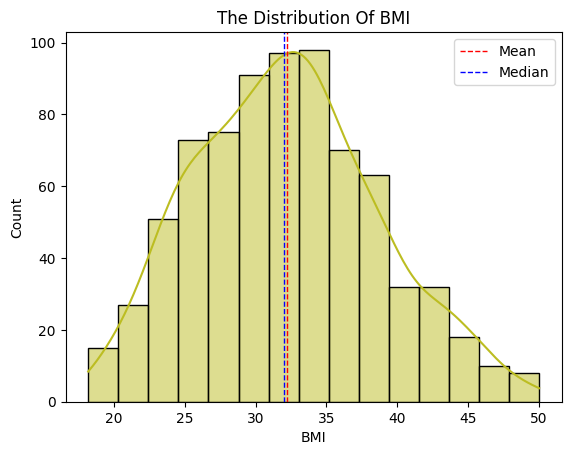

In [37]:
plot_histogram_with_stats(data_cleaned, 'BMI', color = color[8], bins = 15)

In [38]:
# Check if the cleaning process was successful
data_cleaned['BMI'].describe()

count    760.000000
mean      32.200945
std        6.444224
min       18.200000
25%       27.500000
50%       32.000000
75%       36.400000
max       50.000000
Name: BMI, dtype: float64

## When should you get scared of being diabetic?

C:\Users\HITECH\AppData\Local\Temp\ipykernel_14396\324137329.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y='Glucose', data=data_cleaned, palette=["green", "indigo"])


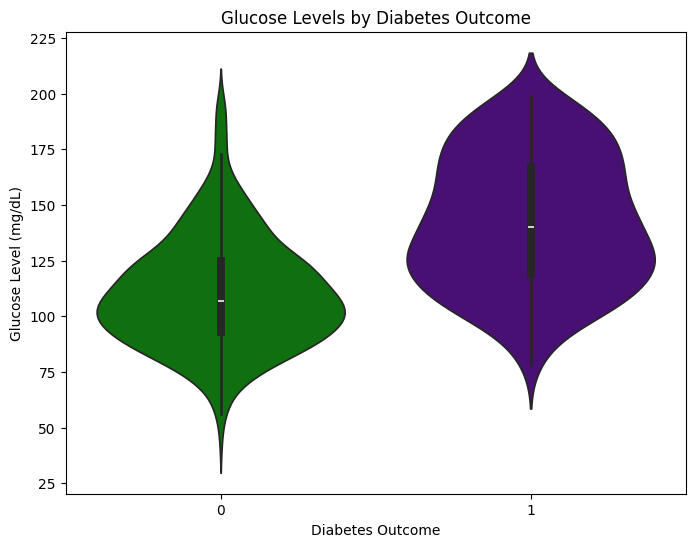

In [39]:
# Violin plot of Glucose levels by Outcome
plt.figure(figsize=(8, 6))
sns.violinplot(x='Outcome', y='Glucose', data=data_cleaned, palette=["green", "indigo"])
plt.title("Glucose Levels by Diabetes Outcome")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Glucose Level (mg/dL)")
plt.show()

C:\Users\HITECH\AppData\Local\Temp\ipykernel_14396\1173503753.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Glucose', data=data, palette=["blue", "red"])


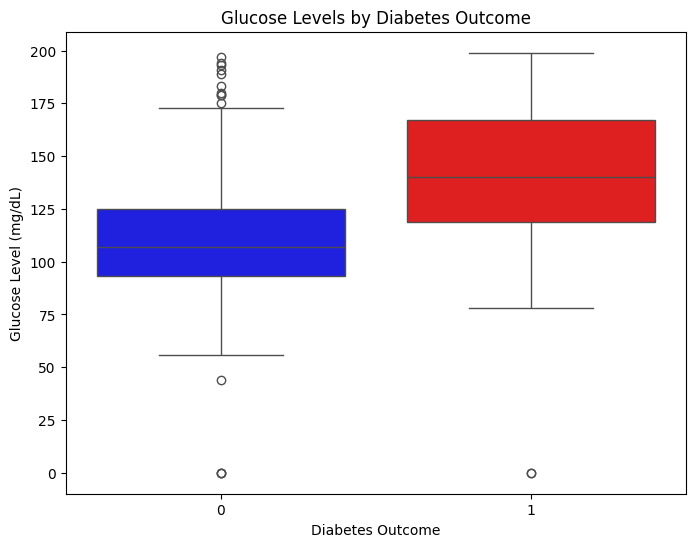

In [40]:

# Ensure 'Outcome' is treated as a categorical variable
data['Outcome'] = data['Outcome'].astype('category')

# Boxplot of Glucose levels by Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=data, palette=["blue", "red"])
plt.title("Glucose Levels by Diabetes Outcome")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Glucose Level (mg/dL)")
plt.show()

**Observations**

* Individuals with diabetes (Outcome = 1) generally have higher glucose levels compared to non-diabetic individuals (Outcome = 0), which aligns with medical knowledge about diabetes.
* Most non-diabetic individuals (Outcome = 0) falls in the range between 80-125 Glucose levels.
* In the diabetic group, there are some individuals with glucose levels above 200 mg/dL. Such high levels are consistent with the presence of diabetes or poor glucose control.

## Should you think twice when you want to have babies?

Text(0.5, 1.0, 'The relationship between Pregnancy number Vs glucose levels with outcome results')

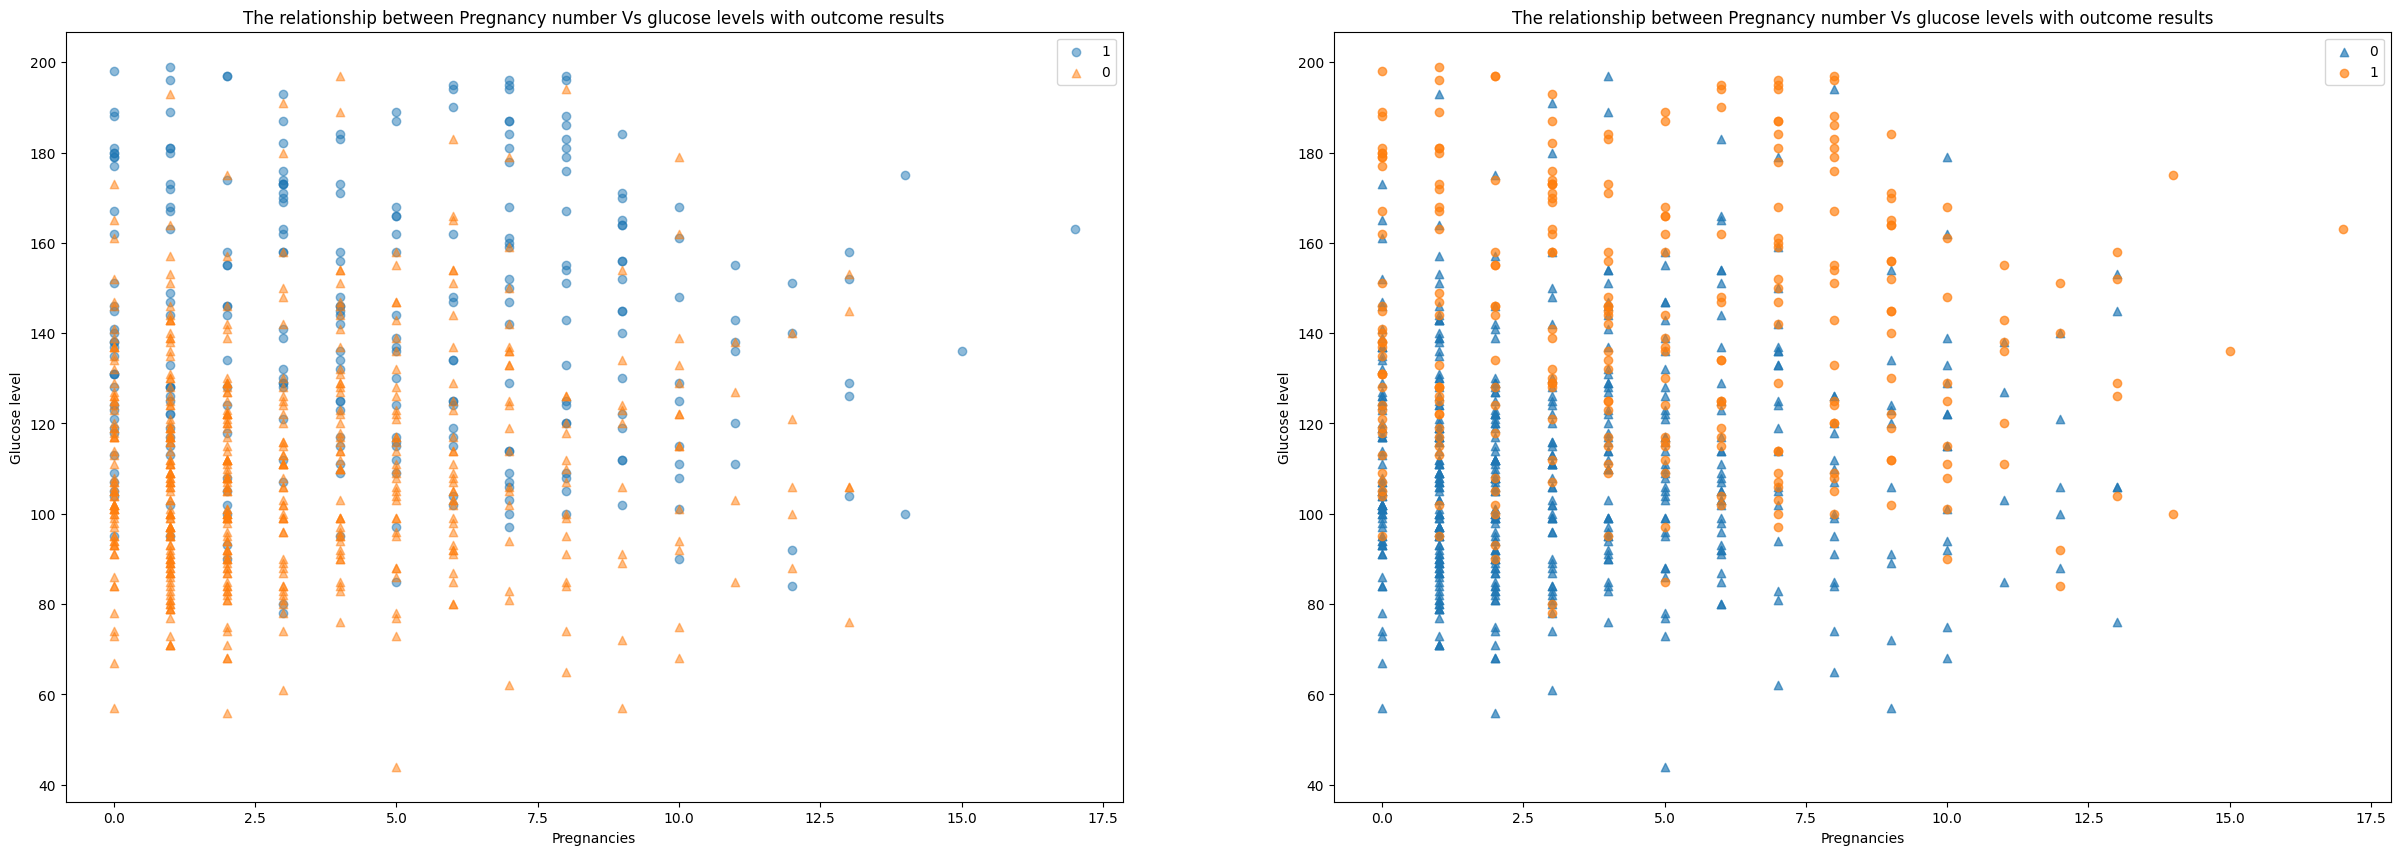

In [41]:
plt.figure(figsize= (30, 10))

plt.subplot(1, 2, 1)
ttype_markers = [[1, 'o'], 
                 [0, '^']]

for ttype, marker in ttype_markers:
    plot_data = data_cleaned.loc[data_cleaned['Outcome'] == ttype]
    sns.regplot(data=plot_data, x='Pregnancies', y='Glucose'
                , scatter_kws={'alpha' : 0.5}, fit_reg=False, marker=marker);
plt.xlabel('Pregnancies')
plt.ylabel('Glucose level');
plt.legend(['1', '0']);
plt.title('The relationship between Pregnancy number Vs glucose levels with outcome results')

# Changing the arrangement of the list of the markers
plt.subplot(1, 2, 2)
ttype_markers = [[0, '^'], 
                 [1, 'o']]

for ttype, marker in ttype_markers:
    plot_data = data_cleaned.loc[data_cleaned['Outcome'] == ttype]
    sns.regplot(data=plot_data, x='Pregnancies', y='Glucose'
                , scatter_kws={'alpha' : 0.68}, fit_reg=False, marker=marker);
plt.xlabel('Pregnancies')
plt.ylabel('Glucose level');
plt.legend(['0', '1']);
plt.title('The relationship between Pregnancy number Vs glucose levels with outcome results')

The plots suggest that glucose levels vary significantly regardless of pregnancy count and outcome, indicating that other factors likely contribute more to glucose levels and associated outcomes than just pregnancy count. Hence, one should consider a broader range of health factors when deciding on pregnancy.

C:\Users\HITECH\AppData\Local\Temp\ipykernel_14396\1677605099.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y='Pregnancies', data=data_cleaned, palette=[color[3], color[5]])


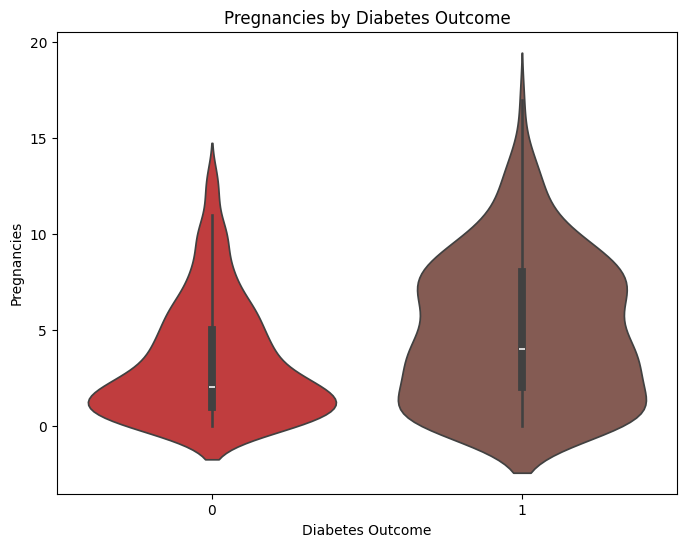

In [42]:
# Violin plot of Pregnancies by Outcome
plt.figure(figsize=(8, 6))
sns.violinplot(x='Outcome', y='Pregnancies', data=data_cleaned, palette=[color[3], color[5]])
plt.title("Pregnancies by Diabetes Outcome")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Pregnancies")
plt.show()

**Observations**

The violin plots distributions however shows that 


* For non-diabetic individuals there is a sharp peak around 0.8-2.5, followed by a tapering of density beyond 5, suggesting the highest of non-diabetics individuals had low pregnancies number (Number of times the patient has been pregnant).
* For diabetics individuals distribution has a broader density distribution, with a noticeable secondary peak around 6-10. This suggests that while there's a large number of  diabetic individuals who have a lower pregnancy number, there is a significant number with higher pregnancy number, suggesting that the risk of getting diabetes increases with the increase of pregnancy number.

## Why would you consider losing weight?

C:\Users\HITECH\AppData\Local\Temp\ipykernel_14396\4251128412.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y='BMI', data=data_cleaned, palette=[color[6], color[2]])


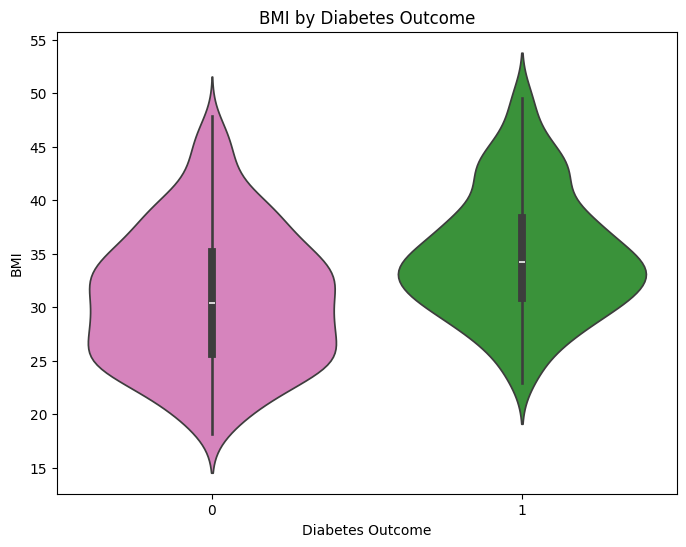

In [43]:
# Violin plot of BMI by Outcome
plt.figure(figsize=(8, 6))
sns.violinplot(x='Outcome', y='BMI', data=data_cleaned, palette=[color[6], color[2]])
plt.title("BMI by Diabetes Outcome")
plt.xlabel("Diabetes Outcome")
plt.ylabel("BMI")
plt.show()

Text(0.5, 1.0, 'The relationship between BMI Vs glucose levels with outcome results')

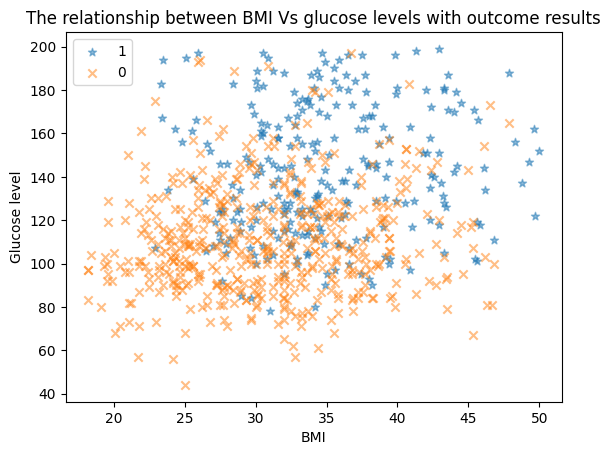

In [44]:
type_markers = [[1, '*'], 
                 [0, 'x']]

for ttype, marker in type_markers:
    plot_data = data_cleaned.loc[data_cleaned['Outcome'] == ttype]
    sns.regplot(data=plot_data, x='BMI', y='Glucose'
                , scatter_kws={'alpha' : 0.5}, fit_reg=False, marker=marker);
plt.xlabel('BMI')
plt.ylabel('Glucose level');
plt.legend(['1', '0']);
plt.title('The relationship between BMI Vs glucose levels with outcome results')

**Observations**

* Individuals with higher BMI tend to have higher glucose levels. This trend is more pronounced among those with a diabetes outcome (Outcome = 1).
* There is some overlap between the two groups, indicating that while higher BMI and glucose levels are associated with diabetes, they are not the sole determinants.


Why would you consider losing weight?

* Higher BMI is associated with increased glucose levels, which is a risk factor for developing diabetes. Losing weight can help lower BMI, which in turn can help manage or reduce glucose levels.
* Maintaining a healthy weight can be a preventive measure against diabetes and other related health conditions such as cardiovascular diseases.
* For individuals already diagnosed with diabetes, weight loss can improve glucose control and overall health outcomes.

## Should you blame your ancestors?

Text(0.5, 1.0, 'The relationship between Diabetes Pedigree Function Vs Glucose with outcome results')

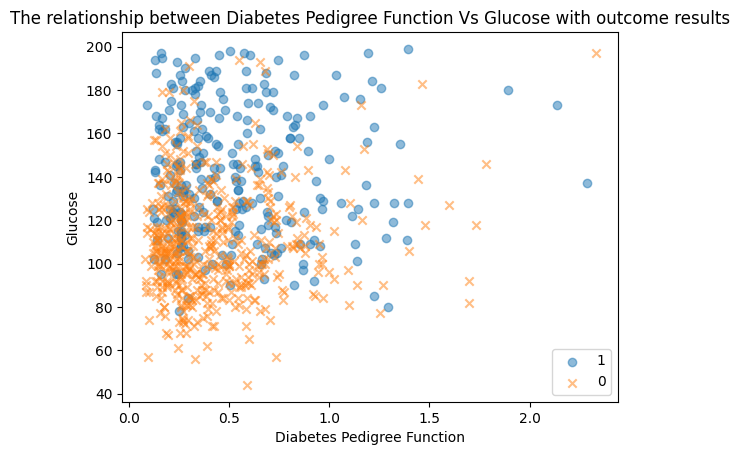

In [45]:
type_markers = [[1, 'o'], 
                 [0, 'x']]

for ttype, marker in type_markers:
    plot_data = data_cleaned.loc[data_cleaned['Outcome'] == ttype]
    sns.regplot(data=plot_data, x='DiabetesPedigreeFunction', y='Glucose'
                , scatter_kws={'alpha' : 0.5}, fit_reg=False, marker=marker);
plt.ylabel('Glucose')
plt.xlabel('Diabetes Pedigree Function');
plt.legend(['1', '0']);
plt.title('The relationship between Diabetes Pedigree Function Vs Glucose with outcome results')

C:\Users\HITECH\AppData\Local\Temp\ipykernel_14396\1780758630.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y='DiabetesPedigreeFunction', data=data_cleaned, palette=[color[7], color[8]])


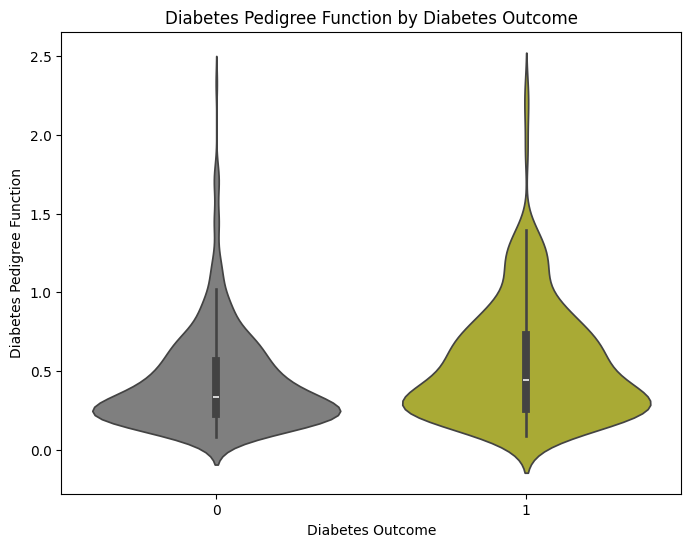

In [46]:
# Violin plot of Diabetes Pedigree Function by Outcome
plt.figure(figsize=(8, 6))
sns.violinplot(x='Outcome', y='DiabetesPedigreeFunction', data=data_cleaned, palette=[color[7], color[8]])
plt.title("Diabetes Pedigree Function by Diabetes Outcome")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Diabetes Pedigree Function")
plt.show()

**Observations**

* For non-diabetic individuals (outcome = 0), there is a sharp peak around 0.3, followed by a tapering of density beyond 0.5, suggesting the highest of non-diabetics individuals had low Diabetes Pedigree Function.
* The diabetic group has a somewhat broader density distribution, with a noticeable secondary peak around 0.7-0.8. This suggests that while most diabetic individuals have a lower pedigree function, there is a small but significant number with higher pedigree function values.
  
While certain health conditions, including diabetes, can indeed be influenced by genetics, However, genetics is only one piece of the puzzle. Environmental factors, lifestyle choices, and personal decisions also play a crucial role in determining health outcomes.

## How much aging is associated with getting diabetes? 

<Axes: xlabel='Age', ylabel='Glucose'>

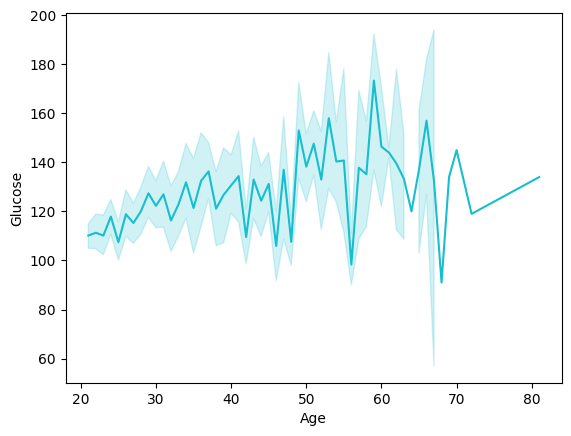

In [47]:
# Since higher Glucose level are associated with outcome being 1, plotting Age and Glucose to see if 
# there's a correlation 
sns.lineplot(data = data_cleaned, x = 'Age', y = 'Glucose', color = color[9])

<Axes: xlabel='Age', ylabel='Glucose'>

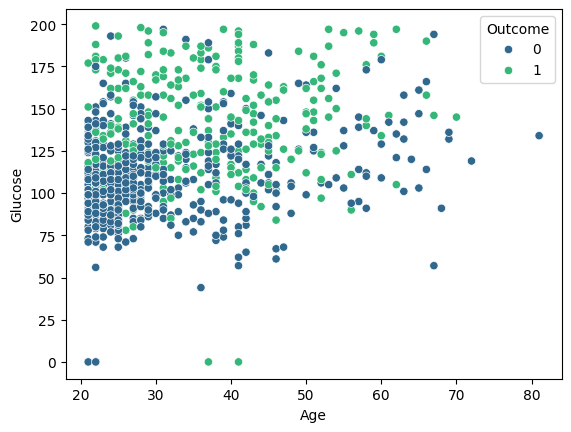

In [48]:
sns.scatterplot(data = data, x = 'Age', y = 'Glucose', hue = 'Outcome', 
                palette = 'viridis')

C:\Users\HITECH\AppData\Local\Temp\ipykernel_14396\3788001558.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y='Age', data=data_cleaned, palette=[color[7], color[8]])


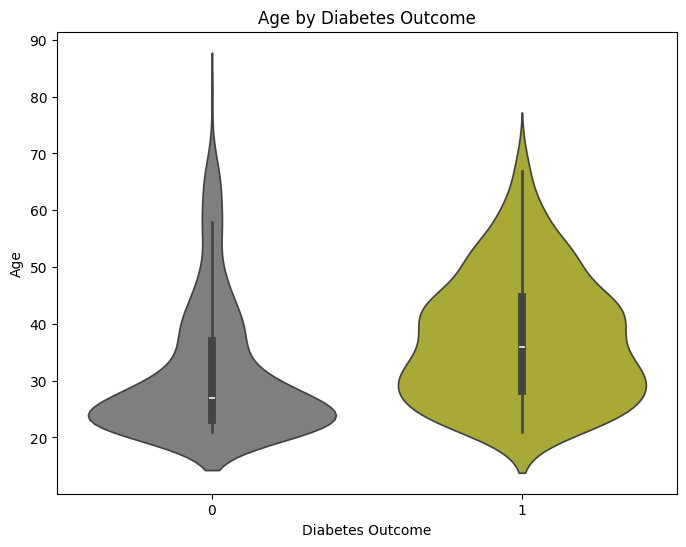

In [49]:
# Violin plot of Age by Outcome
plt.figure(figsize=(8, 6))
sns.violinplot(x='Outcome', y='Age', data=data_cleaned, palette=[color[7], color[8]])
plt.title("Age by Diabetes Outcome")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Age")
plt.show()

**Observations**

1- Line Plot (Glucose Levels vs. Age):

  * The line plot indicates a clear trend of increasing glucose levels with age. Particularly, after the age of 50, glucose levels generally rise above 140 mg/dL, which is considered elevated and indicative of potential health risks such as prediabetes or diabetes.
  

2- Scatter Plot (Glucose Levels vs. Age, Colored by Diabetes Outcome):

  * The scatter plot reveals a strong positive relationship between higher glucose levels and diabetes (outcome = 1). Diabetic individuals tend to have significantly elevated glucose levels compared to non-diabetic individuals (outcome = 0).


3- Violin Plot (Diabetes Pedigree Function by Outcome):

  The violin plot shows a more nuanced picture of the distribution of age across diabetic and non-diabetic individuals. 
  * For diabetic individuals (outcome = 1), the distribution features multiple peaks, suggesting a broader density across various ages and a more complex relationship between age and diabetes risk.
   * First peak (ages 25-32): This indicates that a significant portion of younger individuals with diabetes, suggesting that other factor may lead to early-onset diabetes for some.
   * Second peak (ages 39-56): This reflects the increased prevalence of diabetes as individuals reach middle age. This peak corresponds to the observed trend of rising glucose levels after age 50 in the line plot, reinforcing the idea that aging, combined with other factors, significantly increases diabetes risk.
  * For non-diabetic individuals (outcome = 0), the distribution is more concentrated with a single peak between ages 18-29, indicating that most non-diabetic individuals are younger. There is a noticeable decrease in density as age increases, suggesting that non-diabetics become less prevalent with age. This supports the idea that the risk of developing diabetes increases with age.

## What's the risk of a person of Age 54, length 178 cm and weight 96 kg, and Glucose levels of 125 mg/dL getting diabetes?

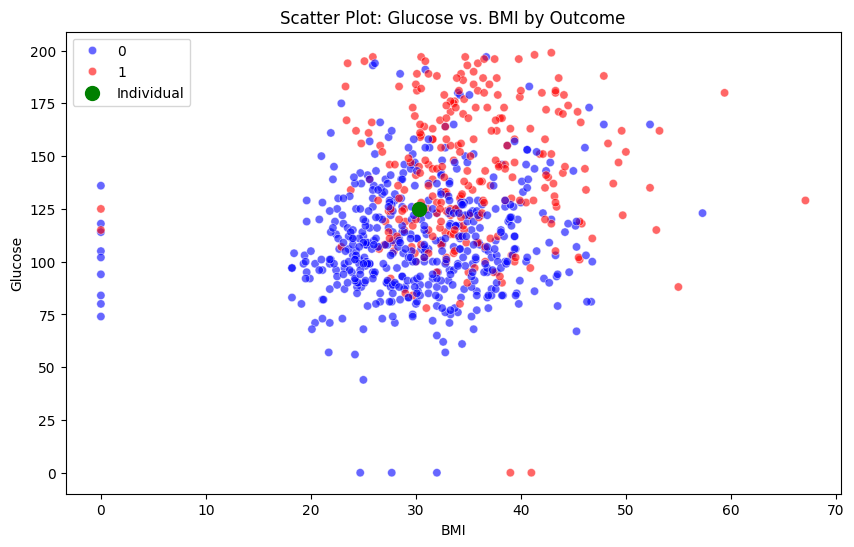

30.299204645878046

In [50]:
# Calculate BMI
height_m = 178 / 100  # Convert height to meters
weight_kg = 96
bmi = weight_kg / (height_m ** 2)

# Scatter Plot: Glucose vs. BMI, colored by Outcome
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='BMI', y='Glucose', hue='Outcome', palette=['blue', 'red'], alpha=0.6)
plt.scatter(bmi, 125, color='green', s=100, label='Individual')
plt.title('Scatter Plot: Glucose vs. BMI by Outcome')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.legend()
plt.show()

bmi

In [51]:
from sklearn.neighbors import KNeighborsClassifier 


In [57]:
# Building a KNeighborsClassifier model to predict the outcome of the individual and its accuracy
y = data_cleaned["Outcome"].values
X = data_cleaned[['Age', 'BMI', 'Glucose']].values

In [58]:
from sklearn.model_selection import train_test_split


In [59]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=49, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

In [60]:
# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [61]:
# Calculate BMI
height_m = 178 / 100  # Convert height to meters
weight_kg = 96
bmi = weight_kg / (height_m ** 2)

# Predict the labels for the X_new
X_new = np.array([[54, bmi, 125]])
y_pred = knn.predict(X_new)


In [62]:
print(y_pred)


[1]


In [63]:
# What's the risk of a person of Age 54, length 178 cm and weight 96 kg, and Glucose levels of 125 mg/dL getting diabetes?
# The accuracy of the model :
# Print the accuracy
print(knn.score(X_test, y_test))

0.7236842105263158


In [64]:
# Saving clean data
data_cleaned.to_csv("diabetes_cleaned.csv")

# **Conclusion**

### 1. **Glucose Levels**:
   - **Most Critical Factor**: High glucose levels are the most strongly associated with diabetes. Diabetic individuals (Outcome = 1) consistently show elevated glucose levels, often exceeding 200 mg/dL. The scatter plot and line plot both highlight this as a primary determinant of diabetes.
   - **Normal Range for Non-Diabetics**: Non-diabetic individuals (Outcome = 0) typically have glucose levels in the range of 80-125 mg/dL. This makes glucose a clear differentiator between diabetic and non-diabetic individuals.

### 2. **Body Mass Index (BMI)**:
   - **Weight and Glucose Connection**: Higher BMI is associated with increased glucose levels, especially in diabetic individuals. There is a clear trend showing that individuals with a higher BMI tend to have higher glucose levels, reinforcing the connection between obesity and diabetes risk.
   - **Weight Management**: Losing weight can lower BMI, which in turn may help reduce glucose levels and manage diabetes or even prevent it in at-risk individuals.

### 3. **Pregnancy History** (Number of Times Pregnant):
   - **Increased Diabetes Risk with Higher Pregnancy Numbers**: The violin plot shows that diabetic individuals tend to have a broader distribution of pregnancy numbers, with a secondary peak at higher pregnancy counts. This suggests that the **number of pregnancies** could be a factor increasing the risk of developing diabetes. 
   - **Non-Diabetic Individuals**: In contrast, non-diabetic individuals tend to have lower pregnancy numbers, with a sharp peak indicating that most non-diabetics have fewer pregnancies.

### 4. **Diabetes Pedigree Function**:
   - **Genetic Influence**: The violin plot reveals that a higher Diabetes Pedigree Function (which reflects family history) is linked to an increased likelihood of diabetes. Diabetic individuals tend to have a broader distribution of pedigree function scores, with a noticeable secondary peak at higher values. 
   - **Genetics vs. Environment**: While genetics play an important role, environmental factors and lifestyle choices are also crucial. Not all individuals with a high pedigree function develop diabetes, indicating that genetics alone does not determine the outcome.

### 5. **Age**:
   - **Age-Related Glucose Increase**: The line plot shows that glucose levels tend to rise with age, particularly after 50. While age alone is not a consistent predictor of diabetes (as seen in the scatter plot), it is an important factor that interacts with other variables, such as glucose levels and BMI, to increase diabetes risk.
   - **Age and Diabetes Distribution**: The violin plot shows multiple peaks for diabetic individuals, indicating that diabetes risk increases with age, particularly in the 25-32 and 39-56 age ranges. Non-diabetic individuals are more concentrated at younger ages, with the prevalence decreasing as they get older.

### 6. **Other Factors (Interacting Variables)**:
   - **Complex Relationships**: The combination of age, genetics (Diabetes Pedigree Function), BMI, and pregnancy history all interact in complex ways to influence diabetes outcomes. These factors do not act independently; instead, they work together, influencing an individual’s overall risk of developing diabetes.
